### Jeu de données de la SNCF

Source:
https://data.sncf.com/explore/dataset/regularite-mensuelle-tgv-aqst/information/?sort=periode

Ce jeu de données contient l'ensemble des lignes TGV arrivant en ou partant de France et gérées par la SNCF.

L'objectif sera de tracer l'évolution des retards et annulations suivant la période donnée par cet ensemble de données.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv("source/regularite-mensuelle-tgv-aqst.csv", sep=";")

In [2]:
# Affichage de toutes les colonnes et des 5 premières et 5 dernières lignes
pd.set_option('display.max_rows', 11)
pd.set_option('display.max_columns', None)
df1

,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Commentaire annulations,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Commentaire retards au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,Retard moyen de tous les trains à l'arrivée,Commentaire retards à l'arrivée,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
0,2018-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,3.693179,NaN,147,28.436735,6.511118,NaN,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,0.095796,NaN,34,21.524020,5.696096,NaN,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,1.003981,NaN,26,55.692308,7.578947,"Ce mois-ci, l'OD a été touchée par les inciden...",26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,1.966667,NaN,13,48.623077,6.790686,"Ce mois-ci, l'OD a été touchée par les inciden...",8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,0.886889,NaN,71,12.405164,3.346487,NaN,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7423,2022-12,National,PARIS NORD,DOUAI,70,136,18,NaN,15,12.947778,1.456497,NaN,10,44.406667,4.890113,NaN,6,66.233333,2,2,20.000000,40.000000,10.000000,10.000000,10.000000,10.000000
7424,2022-12,National,PERPIGNAN,PARIS LYON,310,187,16,NaN,39,13.520085,3.112708,NaN,26,44.682051,8.645833,NaN,26,44.682051,16,8,23.076923,19.230769,23.076923,23.076923,7.692308,3.846154
7425,2022-12,National,RENNES,PARIS MONTPARNASSE,102,817,69,NaN,394,10.889805,5.797625,NaN,169,32.192012,7.938732,NaN,111,42.353153,62,16,22.023810,18.452381,22.619048,24.404762,2.976190,9.523810
7426,2022-12,National,STRASBOURG,NANTES,325,62,10,NaN,20,11.572500,4.554808,NaN,10,54.665000,11.893269,NaN,10,54.665000,8,3,50.000000,0.000000,10.000000,10.000000,10.000000,20.000000


In [3]:
pd.set_option('display.max_rows', None)
df1.dtypes

Date                                                                                            object
Service                                                                                         object
Gare de départ                                                                                  object
Gare d'arrivée                                                                                  object
Durée moyenne du trajet                                                                          int64
Nombre de circulations prévues                                                                   int64
Nombre de trains annulés                                                                         int64
Commentaire annulations                                                                        float64
Nombre de trains en retard au départ                                                             int64
Retard moyen des trains en retard au départ                              

In [4]:
df1.describe()

,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Commentaire annulations,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Commentaire retards au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,Retard moyen de tous les trains à l'arrivée,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
count,7428.000000,7428.000000,7428.000000,0.0,7428.000000,7428.000000,7428.000000,0.0,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000,7428.000000
mean,169.537157,252.838988,10.593700,NaN,89.388530,10.860356,3.046966,NaN,34.110124,33.411687,5.581200,24.000269,30.825946,11.357970,4.079564,23.560568,22.032626,18.858527,18.803780,6.546973,6.979970
std,87.454109,171.523652,25.692063,NaN,91.538557,12.686470,5.529474,NaN,29.877547,15.248684,8.269612,21.420247,19.851561,11.201504,4.802046,17.042406,15.946808,14.913409,14.360738,8.082902,10.412434
min,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,-229.269444,NaN,0.000000,-40.109259,-472.638889,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,138.000000,0.000000,NaN,22.000000,4.827268,1.098291,NaN,13.000000,24.211179,3.064211,9.000000,9.832984,4.000000,1.000000,11.864407,11.538462,8.333333,9.090909,0.000000,0.000000
50%,163.000000,218.000000,2.000000,NaN,56.000000,8.676902,2.215148,NaN,26.000000,31.995965,4.870460,19.000000,33.892931,8.000000,3.000000,21.294036,20.000000,16.666667,16.666667,4.878049,3.333333
75%,221.000000,327.000000,9.000000,NaN,130.000000,13.750296,3.859527,NaN,47.000000,40.832860,7.530911,33.000000,43.180842,15.000000,6.000000,33.333333,30.000000,26.666667,25.806452,9.725295,9.859155
max,786.000000,1051.000000,288.000000,NaN,596.000000,316.188095,84.516667,NaN,376.000000,255.866667,92.000000,312.000000,255.866667,202.000000,71.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


#### Observations sur ces données

Sur nos 3 colonnes _Commentaire_, seule une semble être utilisée. Les 2 premières sont complètement vides. La 3ème contient des chaines de caractères qu'il faudra étudier. En effet, on cherche l'évolution des retards et des annulations, peut-être que ces commentaires apporteront des informations utiles sur ces retards.

Nos données se présentent sous la forme d'un comptage de liaisons pour chaque mois pour chaque couple (gare départ, gare d'arrivée). Les dates sont à une fréquence mensuelle, mais ne sont peut-être pas au format DateTime.

Ce qui nous intéresse essentiellement ce sont les Dates, les nombres de trains prévus, les trains annulés et les retards à l'arrivée.

In [50]:
df1["Date"] = pd.to_datetime(df1["Date"], format="%Y-%m")
pd.set_option('display.max_rows', 11)
df1

,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Commentaire annulations,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Commentaire retards au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,Retard moyen de tous les trains à l'arrivée,Commentaire retards à l'arrivée,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,NaN,289,11.247809,3.693179,NaN,147,28.436735,6.511118,NaN,110,6.511118,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,NaN,8,2.875000,0.095796,NaN,34,21.524020,5.696096,NaN,22,5.696096,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,NaN,37,9.501351,1.003981,NaN,26,55.692308,7.578947,"Ce mois-ci, l'OD a été touchée par les inciden...",26,7.548387,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,NaN,12,19.912500,1.966667,NaN,13,48.623077,6.790686,"Ce mois-ci, l'OD a été touchée par les inciden...",8,6.724757,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,NaN,61,7.796995,0.886889,NaN,71,12.405164,3.346487,NaN,17,3.346487,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7423,2022-12-01,National,PARIS NORD,DOUAI,70,136,18,NaN,15,12.947778,1.456497,NaN,10,44.406667,4.890113,NaN,6,66.233333,2,2,20.000000,40.000000,10.000000,10.000000,10.000000,10.000000
7424,2022-12-01,National,PERPIGNAN,PARIS LYON,310,187,16,NaN,39,13.520085,3.112708,NaN,26,44.682051,8.645833,NaN,26,44.682051,16,8,23.076923,19.230769,23.076923,23.076923,7.692308,3.846154
7425,2022-12-01,National,RENNES,PARIS MONTPARNASSE,102,817,69,NaN,394,10.889805,5.797625,NaN,169,32.192012,7.938732,NaN,111,42.353153,62,16,22.023810,18.452381,22.619048,24.404762,2.976190,9.523810
7426,2022-12-01,National,STRASBOURG,NANTES,325,62,10,NaN,20,11.572500,4.554808,NaN,10,54.665000,11.893269,NaN,10,54.665000,8,3,50.000000,0.000000,10.000000,10.000000,10.000000,20.000000


In [6]:
help(sns.lineplot)

Help on function lineplot in module seaborn.relational:

lineplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)
    Draw a line plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can be help

#### Cas simple, la liasion Paris-Lille

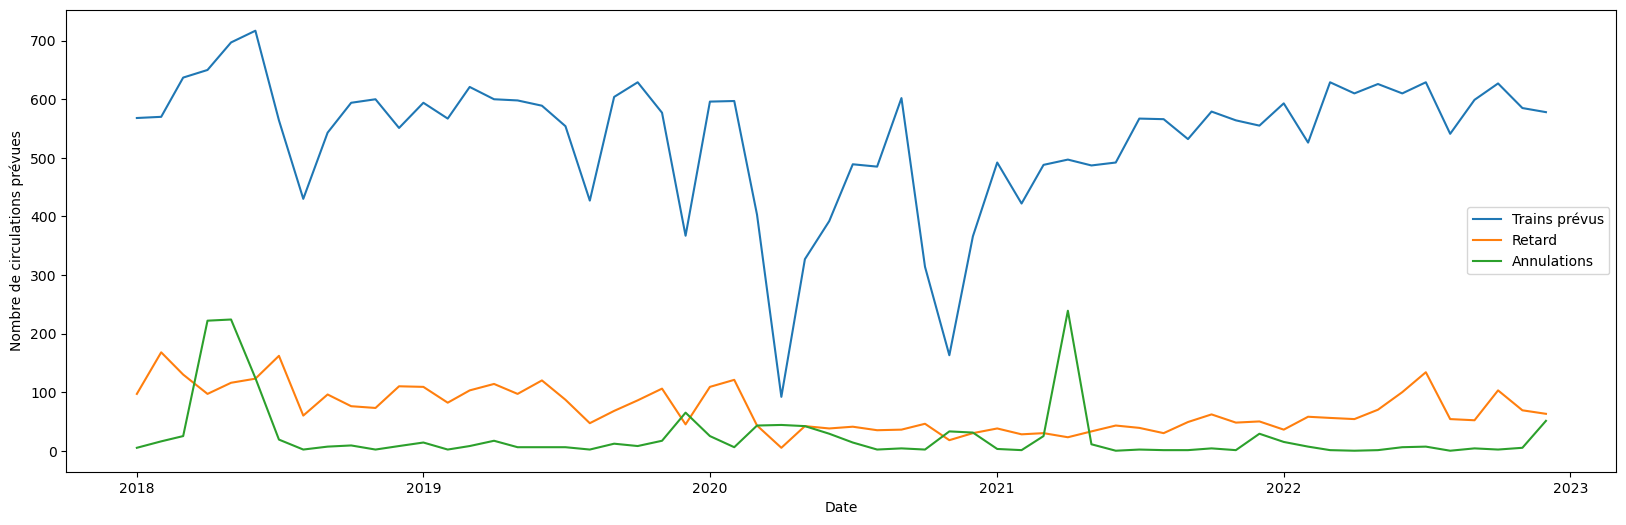

In [58]:
# Sens Paris -> Lille
df2 = df1[(df1["Gare de départ"].str.contains("PARIS")) & (df1["Gare d'arrivée"].str.contains("LILLE"))]
plt.subplots(figsize=(20,6))
sns.lineplot(x="Date", y="Nombre de circulations prévues", data=df2, label='Trains prévus')
sns.lineplot(x="Date", y="Nombre de trains en retard à l'arrivée", data=df2, label='Retard')
sns.lineplot(x="Date", y="Nombre de trains annulés", data=df2, label='Annulations')
plt.show()

In [59]:
df2

,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Commentaire annulations,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Commentaire retards au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,Retard moyen de tous les trains à l'arrivée,Commentaire retards à l'arrivée,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
67,2018-01-01,National,PARIS NORD,LILLE,64,568,5,NaN,98,8.828912,1.499230,NaN,97,21.024914,4.133274,NaN,40,4.133274,15,6,38.095238,21.428571,9.523810,21.428571,9.523810,0.000000
245,2018-02-01,National,PARIS NORD,LILLE,68,570,16,NaN,178,15.057022,4.851233,NaN,168,28.459226,9.378309,Intempéries exceptionnelles vécues lors de la ...,88,9.361411,47,19,48.765432,9.259259,15.432099,22.222222,3.703704,0.617284
271,2018-03-01,National,PARIS NORD,LILLE,67,637,25,NaN,135,16.289753,3.584967,NaN,130,24.380897,5.750245,"En ce qui concerne Réseau, le défaut de géomét...",54,5.750245,26,9,21.428571,22.222222,25.396825,23.015873,7.142857,0.793651
404,2018-04-01,National,PARIS NORD,LILLE,67,650,222,NaN,115,10.286522,2.804206,NaN,97,17.230756,4.223871,NaN,36,4.223871,14,5,19.318182,21.590909,23.863636,21.590909,10.227273,3.409091
598,2018-05-01,National,PARIS NORD,LILLE,61,697,224,NaN,64,32.627344,4.634073,NaN,116,29.296121,7.953594,NaN,46,7.953594,32,18,40.540541,18.918919,23.423423,9.909910,5.405405,1.801802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,2022-08-01,National,PARIS NORD,LILLE,67,541,0,NaN,57,9.754386,0.761645,NaN,54,16.279295,1.597905,NaN,16,29.146875,5,2,21.087216,7.646356,23.178017,32.556750,3.823178,11.708483
7056,2022-09-01,National,PARIS NORD,LILLE,66,599,4,NaN,67,11.480846,0.969048,NaN,52,22.447524,2.258908,NaN,22,39.925758,12,5,27.948718,8.044872,17.916667,24.006410,8.076923,14.006410
7153,2022-10-01,National,PARIS NORD,LILLE,66,627,2,NaN,88,19.634659,2.441013,NaN,103,26.692328,5.002027,NaN,40,53.625000,17,7,9.000013,38.998740,15.999877,22.001203,6.000448,7.999719
7303,2022-11-01,National,PARIS NORD,LILLE,66,585,5,NaN,52,18.957692,1.392820,NaN,69,30.589186,4.055662,NaN,34,52.021569,23,5,16.908213,23.119393,24.706694,21.256039,7.798482,6.211180


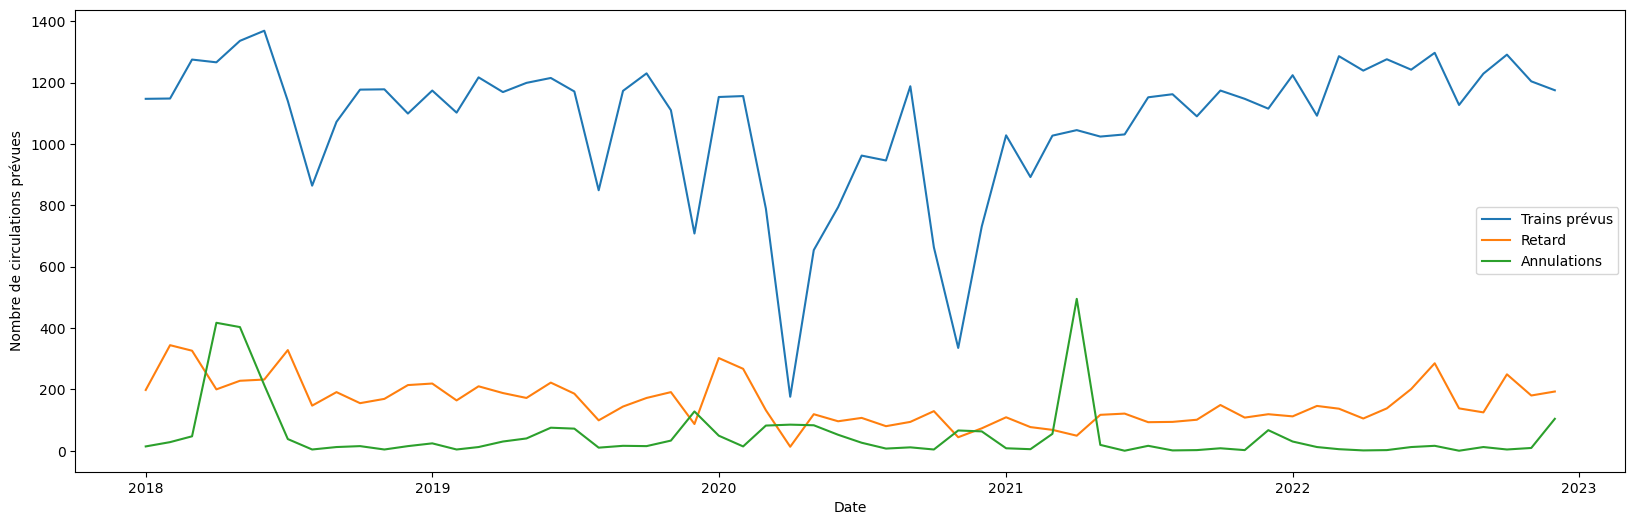

In [57]:
# Sens Paris -> Lille ET Lille -> Paris
df2 = df1[(
    (df1["Gare de départ"].str.contains("PARIS NORD")) & (df1["Gare d'arrivée"].str.contains("LILLE"))
    | (df1["Gare de départ"].str.contains("LILLE")) & (df1["Gare d'arrivée"].str.contains("PARIS NORD"))
)]

dfgrby = df2.loc[:,["Date", "Nombre de circulations prévues", "Nombre de trains en retard à l'arrivée", "Nombre de trains annulés"]]
dfgrby = dfgrby.groupby(by="Date").sum()

plt.subplots(figsize=(20,6))
sns.lineplot(x="Date", y="Nombre de circulations prévues", data=dfgrby, label='Trains prévus')
sns.lineplot(x="Date", y="Nombre de trains en retard à l'arrivée", data=dfgrby, label='Retard')
sns.lineplot(x="Date", y="Nombre de trains annulés", data=dfgrby, label='Annulations')
plt.show()

In [51]:
df2

,Date,Service,Gare de départ,Gare d'arrivée,Durée moyenne du trajet,Nombre de circulations prévues,Nombre de trains annulés,Commentaire annulations,Nombre de trains en retard au départ,Retard moyen des trains en retard au départ,Retard moyen de tous les trains au départ,Commentaire retards au départ,Nombre de trains en retard à l'arrivée,Retard moyen des trains en retard à l'arrivée,Retard moyen de tous les trains à l'arrivée,Commentaire retards à l'arrivée,Nombre trains en retard > 15min,Retard moyen trains en retard > 15 (si liaison concurrencée par vol),Nombre trains en retard > 30min,Nombre trains en retard > 60min,Prct retard pour causes externes,Prct retard pour cause infrastructure,Prct retard pour cause gestion trafic,Prct retard pour cause matériel roulant,Prct retard pour cause gestion en gare et réutilisation de matériel,"Prct retard pour cause prise en compte voyageurs (affluence, gestions PSH, correspondances)"
41,2018-01-01,National,LILLE,PARIS NORD,63,579,9,NaN,164,8.221951,2.344327,NaN,101,22.205776,4.229620,NaN,38,4.222212,17,10,36.231884,8.695652,21.739130,23.188406,5.797101,4.347826
67,2018-01-01,National,PARIS NORD,LILLE,64,568,5,NaN,98,8.828912,1.499230,NaN,97,21.024914,4.133274,NaN,40,4.133274,15,6,38.095238,21.428571,9.523810,21.428571,9.523810,0.000000
191,2018-02-01,National,LILLE,PARIS NORD,64,578,12,NaN,208,9.895433,3.637485,NaN,176,21.622538,7.263221,Intempéries exceptionnelles vécues lors de la ...,79,7.263221,35,13,44.585987,15.923567,19.108280,17.197452,2.547771,0.636943
245,2018-02-01,National,PARIS NORD,LILLE,68,570,16,NaN,178,15.057022,4.851233,NaN,168,28.459226,9.378309,Intempéries exceptionnelles vécues lors de la ...,88,9.361411,47,19,48.765432,9.259259,15.432099,22.222222,3.703704,0.617284
271,2018-03-01,National,PARIS NORD,LILLE,67,637,25,NaN,135,16.289753,3.584967,NaN,130,24.380897,5.750245,"En ce qui concerne Réseau, le défaut de géomét...",54,5.750245,26,9,21.428571,22.222222,25.396825,23.015873,7.142857,0.793651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7153,2022-10-01,National,PARIS NORD,LILLE,66,627,2,NaN,88,19.634659,2.441013,NaN,103,26.692328,5.002027,NaN,40,53.625000,17,7,9.000013,38.998740,15.999877,22.001203,6.000448,7.999719
7193,2022-11-01,National,LILLE,PARIS NORD,68,619,4,NaN,152,8.390570,1.854839,NaN,111,21.156251,4.872402,NaN,42,39.705159,27,3,11.552729,20.667727,24.801272,17.647059,16.481187,8.850026
7303,2022-11-01,National,PARIS NORD,LILLE,66,585,5,NaN,52,18.957692,1.392820,NaN,69,30.589186,4.055662,NaN,34,52.021569,23,5,16.908213,23.119393,24.706694,21.256039,7.798482,6.211180
7365,2022-12-01,National,LILLE,PARIS NORD,69,597,53,NaN,176,12.685511,3.986893,NaN,130,25.254820,7.036286,NaN,54,46.233642,27,12,10.274725,14.065934,19.065934,30.714286,16.153846,9.725275


In [42]:
df2.at[191, "Commentaire retards à l'arrivée"]

'Intempéries exceptionnelles vécues lors de la deuxième semaine, et d’autre part suite à la forte tension du parc Matériel qui perdure.En effet, les mauvaises conditions climatiques survenues tôt dans le mois  ont occasionné une situation de blocage, avec de multiples dérangements d’installations de sécurité. En ce qui concerne Réseau, il s’agit d’une répartition entre les dérangements d’installations de sécurité(rails cassés, incidents passages à niveau, incidents caténaires, le domaine Externe (heurts d’animaux) et les travaux (limitation de vitesse et espacements suite travaux de régénération).'

##### Analyse des graphiques

Les colonnes _Commentaire_ ne sont pas souvent pertinentes pour comprendre les difficultés rencontrées par la SNCF. Elles expliquent parfois le contexte, mais sans vraiment pouvoir quantifier la cause de contexte sur le taux d'annulations de retard.

En revanche, le graphique montre l'impact d'évènements sur ces 3 courbes. Par exemple, au printemps 2018, la circulation est perturbée par de longues grèves contre la réforme des cheminots. En 2020, on voit aussi que les 2 gouffres de prévisions de trains correspondent aux confinements.

#### Cas final, les données de toutes les liaisons

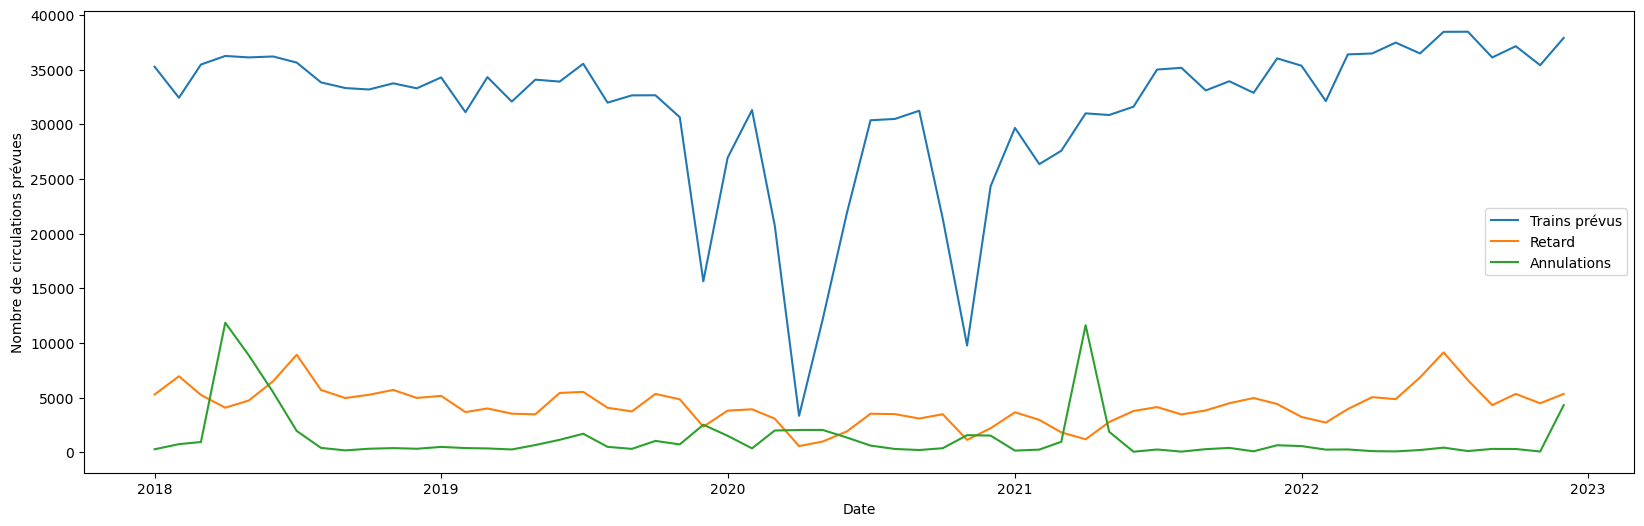

In [82]:
dfgrby = df1.loc[:,["Date", "Nombre de circulations prévues", "Nombre de trains en retard à l'arrivée", "Nombre de trains annulés"]]
dfgrby = dfgrby.groupby(by="Date").sum()

plt.subplots(figsize=(20,6))
sns.lineplot(x="Date", y="Nombre de circulations prévues", data=dfgrby, label='Trains prévus')
sns.lineplot(x="Date", y="Nombre de trains en retard à l'arrivée", data=dfgrby, label='Retards')
sns.lineplot(x="Date", y="Nombre de trains annulés", data=dfgrby, label='Annulations')
plt.show()

Ces courbes permettent de voir des tendances, mais ce serait plus intéressant d'avoir un graphique qui représente l'évolution du pourcentage de retards parmi les trains prévus, pour évaluer si la ponctualité s'est améliorée ou s'est dégradée.

In [83]:
# On ajoute 2 colonnes: % de retards et % d'annulations
dfgrby["Prct_Retards"] = dfgrby["Nombre de trains en retard à l'arrivée"] / dfgrby["Nombre de circulations prévues"]
dfgrby["Prct_Annul"] = dfgrby["Nombre de trains annulés"] / dfgrby["Nombre de circulations prévues"]

In [84]:
dfgrby

,Nombre de circulations prévues,Nombre de trains en retard à l'arrivée,Nombre de trains annulés,Prct_Retards,Prct_Annul
Date,,,,,
2018-01-01,35260,5278,266,0.149688,0.007544
2018-02-01,32419,6941,733,0.214103,0.022610
2018-03-01,35458,5236,929,0.147668,0.026200
2018-04-01,36243,4066,11841,0.112187,0.326711
2018-05-01,36111,4728,8860,0.130930,0.245355
...,...,...,...,...,...
2022-08-01,38460,6584,102,0.171191,0.002652
2022-09-01,36107,4306,298,0.119257,0.008253
2022-10-01,37136,5328,290,0.143473,0.007809


In [86]:
dfgrby.describe()

,Nombre de circulations prévues,Nombre de trains en retard à l'arrivée,Nombre de trains annulés,Prct_Retards,Prct_Annul
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,31301.466667,4222.833333,1311.500000,0.133415,0.054286
std,6999.414534,1677.744785,2419.927366,0.037485,0.105442
min,3325.000000,557.000000,41.000000,0.038009,0.001297
25%,30790.750000,3460.750000,248.750000,0.113737,0.007686
50%,33228.500000,4063.500000,391.000000,0.128234,0.011825
75%,35475.500000,5239.500000,1374.750000,0.151849,0.049194
max,38460.000000,9127.000000,11841.000000,0.250070,0.610526


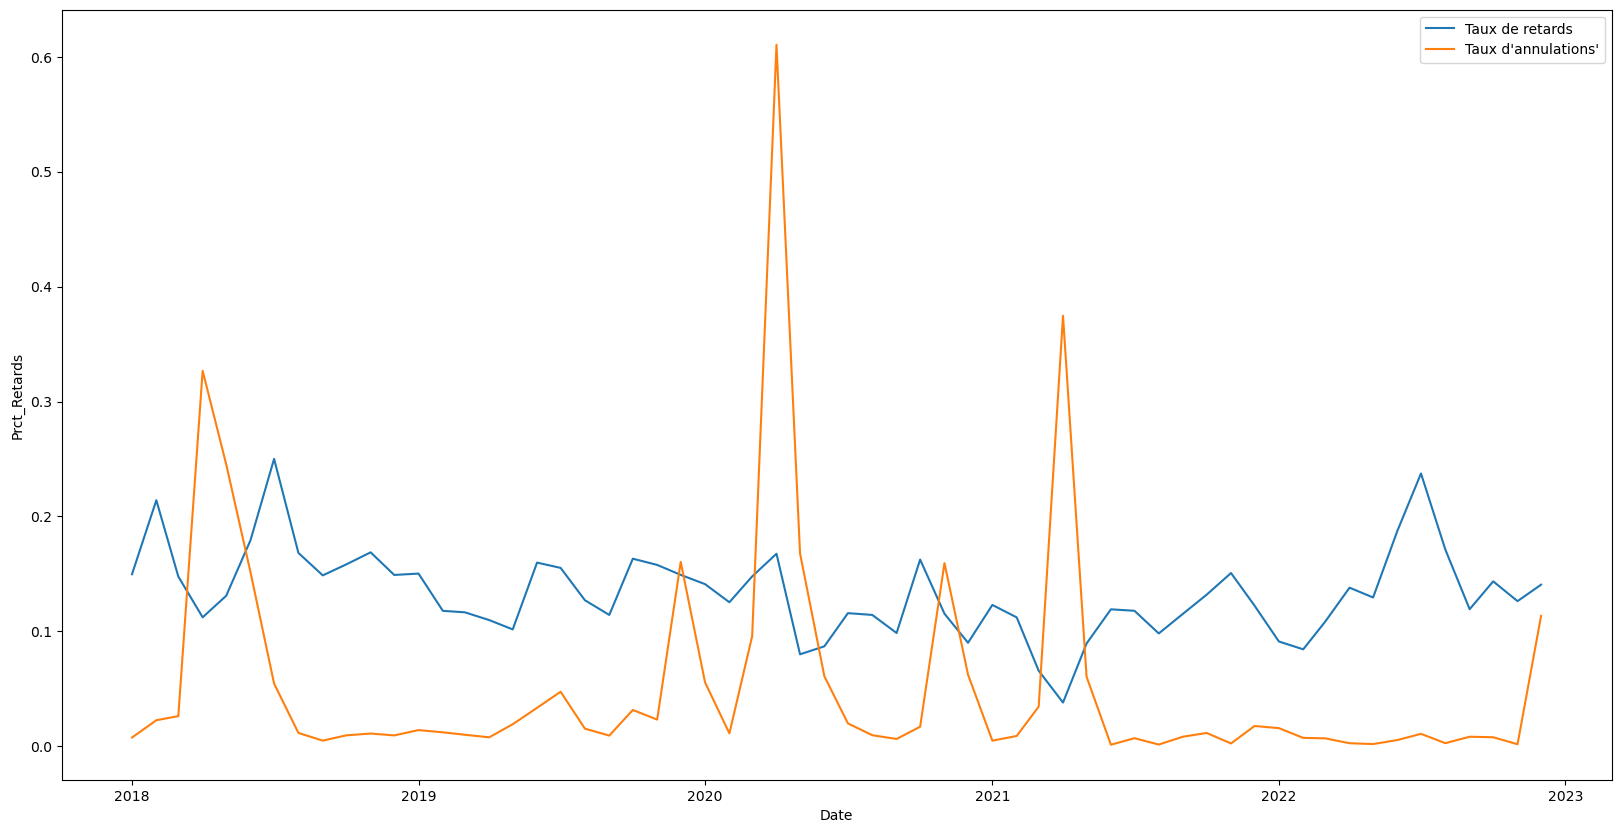

In [85]:
plt.subplots(figsize=(20,10))
sns.lineplot(x="Date", y="Prct_Retards", data=dfgrby, label="Taux de retards")
sns.lineplot(x="Date", y="Prct_Annul", data=dfgrby, label="Taux d'annulations'")
plt.show()

#### Conclusion

Les annulations ont été fortement impactées par des évènements exceptionnels: mouvement sociaux et confinements.

Les retards ont été un peu moins impactés par ces évènements mais le taux de retards a tendance à suivre le nombre de trains prévus en circulation: + on fait circuler de trains, + le taux de retard augmente. Ainsi, les plus bas taux de retard sont observés sur la période post-confinement où l'activité des TGV reprenait doucement, alors que les plus hauts taux sont observés lorsque l'activité des TGV augmente.